# Objective

To build a Naïve Bayes classifier system in Excel for the dataset - US Census 50k Predictor, with the help of python. The below script includes-
1. Data cleaning
2. Handling of missing values and duplicates, if any
3. Data manipulation
4. Finding correlation.


## Reading Data and Importing required libraries

In [10]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

#import necessary packages
import warnings
warnings.filterwarnings('ignore')

#importing necessary data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split

#Load the data
file = "./USCensusAbove50kPredictor.csv"

df = pd.read_csv(file, header = None)

#Check the initial dataset shape and target variable
print("Income is the Target Variable.")
print("Dataset shape: ", df.shape)

#Keep Original data
df_original = pd.DataFrame.copy(df)

#df_len=len(df)



Income is the Target Variable.
Dataset shape:  (26527, 13)
26527


## Insert Columns

Insert columns to the dataset and map each column to the provided dictionary.

In [14]:
#Naming columns to the dataset
df.columns =["Age","Job_Occupation","Employment_Type","Weekly_Working_Hrs","Gain_loss","Education","Completed_Yrs_Education","Marital_Status","Rel_Title","Race",'Gender','Country',"Income"]


## Identify Outliers

Below we are introducing the box plot to identify the outliers, and strike a comparison between the quartiles.
Observed variables:
    1) Weekly working hours
    2) Age

<AxesSubplot:xlabel='Weekly_Working_Hrs'>

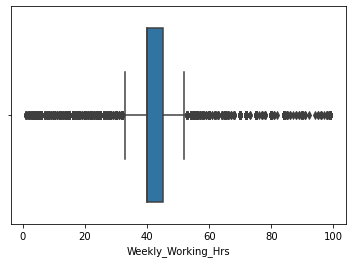

In [15]:
#Detect Outliers Weekly hours worked
sns.boxplot(df['Weekly_Working_Hrs'])


<AxesSubplot:xlabel='Age'>

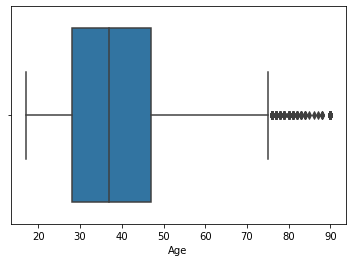

In [16]:
#Detect Outliers Age
sns.boxplot(df['Age'])

## Handling Duplicates

Identifying duplicate entries in the dataset and removing them.

In [7]:
#Note: In hindsight this section of code is dangerous, deleting the dataset is like tempering with evidence.
#Note: I have left the code here, however commnented this out after my own code review.

#Check, sum and drop duplicated rows
# if df.duplicated().sum()>0:
#     print("There are "+str(df.duplicated().sum())+" duplicate rows in the input dataset and has to be deleted.")
# else:
#     print("There are Zero duplicates in the data")
    
# df = df.drop_duplicates()
# print(str(df_len-len(df))+ " duplicate rows are deleted.")
# print("The DataFrame has",df.shape[0],"rows and",df.shape[1],"columns after dropping the duplicates.")


There are Zero duplicates in the data
2444 duplicate rows are deleted.
The DataFrame has 24065 rows and 13 columns after dropping the duplicates.


# Missing Value Treatment

We check if we have any standard missing values and remove them from the dataset.
Here, we confirm whether there aren't any custom missing values by displaying the head and tail, and imputing that.

In [25]:
#Check where null values exist
if df.isnull().sum().sum() == 0:
    print("\n There are no standard missing Values in the data. \n")
else:
    print("There are "+str(df.isnull().sum().sum())+" missing values in the input data")
print(df.info())    



 There are no standard missing Values in the data. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26527 entries, 0 to 26526
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      26527 non-null  int64 
 1   Job_Occupation           26527 non-null  object
 2   Employment_Type          26527 non-null  object
 3   Weekly_Working_Hrs       26527 non-null  int64 
 4   Gain_loss                26527 non-null  int64 
 5   Education                26527 non-null  object
 6   Completed_Yrs_Education  26527 non-null  int64 
 7   Marital_Status           26527 non-null  object
 8   Rel_Title                26527 non-null  object
 9   Race                     26527 non-null  object
 10  Gender                   26527 non-null  object
 11  Country                  26527 non-null  object
 12  Income                   26527 non-null  object
dtypes: int64(4), object(9)
memory usage: 

In [34]:
#Print the data and identify encoded missing values

#Head
print(df.head(n=50))

#Tail
print(df.tail(n=50))

    Age      Job_Occupation    Employment_Type  Weekly_Working_Hrs  Gain_loss  \
0    49        Craft-repair            Private                  40       7298   
1    28      Prof-specialty          Local-gov                  40       7298   
2    31   Handlers-cleaners            Private                  40          0   
3    21        Craft-repair            Private                  40          0   
4    22        Adm-clerical            Private                  20          0   
5    42     Exec-managerial   Self-emp-not-inc                  48          0   
6    53        Craft-repair            Private                  40          0   
7    53               Sales   Self-emp-not-inc                  40          0   
8    60        Adm-clerical            Private                  37          0   
9    19               Sales   Self-emp-not-inc                  16          0   
10   63       Other-service            Private                  40          0   
11   49     Exec-managerial 

In [10]:
#Treat missing values

df[df== ' ?'] = np.nan

#handling the missing values by replacing them with MODE
for col in ['Job_Occupation', 'Employment_Type', 'Country']:
    df[col].fillna(df[col].mode()[0], inplace = True)

## Create Bins
Here we drop variables that will not be included in the data as bins. We create bins to include in the trained feature files.
Variables for which bins are created:
    
    1) Age
    2) Weekly working hours

Variables to exclude:
    1) Gain Loss



In [35]:
#Creating quantile for Age
ageQ = np.percentile(df.Age, [25, 50, 75, 100])

#Create Age Bin
df["Age_Bin"] = df.loc[ : , "Age"]

#Iterate through the Age and assign that to a bin
for index, row in df.iterrows():
    
    age = row['Age_Bin'];
    
    if age <= ageQ[0]:
        
        df.at[index, 'Age_Bin'] = 0
        
    elif age > ageQ[0] and age < ageQ[1]:
        
        df.at[index, 'Age_Bin'] = 1
        
    elif age >= ageQ[1] and age < ageQ[2]:
        
        df.at[index, 'Age_Bin'] = 2
        
    elif age >= ageQ[2]:
        
        df.at[index, 'Age_Bin'] = 3
        
  

In [36]:
#Create Weekly hour Bin
df["Weekly_Working_Hrs_Bin"] = df.loc[ : , "Weekly_Working_Hrs"]

In [37]:
#Creating quantile for working hours

workHourQ = np.percentile(df.Weekly_Working_Hrs, [20, 50, 75, 100])

for index, row in df.iterrows():
    
    age = row['Weekly_Working_Hrs_Bin'];
    
    if age <= workHourQ[0]:
        
        df.at[index, 'Weekly_Working_Hrs_Bin'] = 0
        
    elif age > workHourQ[0] and age < workHourQ[1]:
        
        df.at[index, 'Weekly_Working_Hrs_Bin'] = 1
        
    elif age >= workHourQ[1] and age < workHourQ[2]:
        
        df.at[index, 'Weekly_Working_Hrs_Bin'] = 2
        
    elif age >= workHourQ[2]:
        
        df.at[index, 'Weekly_Working_Hrs_Bin'] = 3



In [38]:
#Drop the variable after transformation
df.drop('Weekly_Working_Hrs',axis=1,inplace=True)


In [39]:
#Drop the variable after transformation
df.drop('Gain_loss',axis=1,inplace=True)

## Confirm Correlation and Transformation 
Here we confirm the correlation between Age, Completed Years of Education and the bins.
We also make sure that we transform variables that are to be referred to as binary.

In [40]:
# linear (Pearson) correlation
df.corr(method = 'pearson').round(decimals = 2)

,Age,Completed_Yrs_Education,Age_Bin,Weekly_Working_Hrs_Bin
Age,1.00,0.05,0.93,0.10
Completed_Yrs_Education,0.05,1.00,0.06,0.15
Age_Bin,0.93,0.06,1.00,0.15
Weekly_Working_Hrs_Bin,0.10,0.15,0.15,1.00


In [41]:
#Introduce Categorical variables
df["Income_>50k"] = df.loc[ : , "Income"]

In [42]:
# Converting the Income columns into Binary
df.loc[df["Income_>50k"] == " <=50K" , "Income_>50k"] = 0
df.loc[df["Income_>50k"] == " >50K" , "Income_>50k"] = 1

In [43]:
#Drop the variable after transformation
df.drop('Income',axis=1,inplace=True)

In [44]:
#Drop the variable after transformation
df.drop('Gender',axis=1,inplace=True)

## Categorization
In this section we are categorizing the variables that have been identified to contain categories in their features.
Once the categories are in place, we check for distinct values for confirmation.

In [45]:
df.loc[:,'Country']

#Assign Binary columns
df["Continent"] = df.loc[ : , "Country"]

#Categorizing countries into continents

#Create Dictionary per continent
Continent_map = {
  "Italy": "Europe",
  "England": "Europe",
  "Ireland": "Europe",
  "Greece": "Europe",
  "Poland": "Europe",
  "Italy": "Europe",
  "Scotland": "Europe",
  "Germany": "Europe",
  "Yugoslavia": "Europe",
  "Portugal": "Europe",
  "Hungary": "Europe",
  "Holand-Netherlands": "Europe",
  "France": "Europe",
  "Thailand": "Asia",
  "Hong Kong": "Asia",
  "Cambodia": "Asia",
  "India": "Asia",
  "Indonesia": "Asia",
  "Laos": "Asia",
  "Pakistan": "Asia",
  "Bangladesh": "Asia",
  "South Korea": "Asia",
  "Japan": "Asia",
  "Philippines": "Asia",
  "Vietnam": "Asia",
  "Taiwan": "Asia",
  "Iran": "Asia",
  "China": "Asia",
  "Vietnam": "Asia",
  "United States": "North America",
  "Canada": "North America",
  "Mexico": "Latin America and Caribbean",
  "Colombia": "Latin America and Caribbean",
  "Guatemala": "Latin America and Caribbean",
  "Canada": "Latin America and Caribbean",
  "El-Salvador": "Latin America and Caribbean",
  "Jamaica": "Latin America and Caribbean",
  "Peru": "Latin America and Caribbean",
  "Columbia": "Latin America and Caribbean",
  "Dominican-Republic": "Latin America and Caribbean",
  "Puerto-Rico": "Latin America and Caribbean",
  "Trinadad&Tobago": "Latin America and Caribbean",
  "Cuba": "Latin America and Caribbean",
  "Ecuador": "Latin America and Caribbean",
  "Nicaragua": "Latin America and Caribbean",
  "Haiti": "Latin America and Caribbean",
  "Honduras": "Latin America and Caribbean",
  "South Africa": "Africa",
  "Gabon": "Africa",
  "Nigeria": "Africa",
  "Australia": "Oceania",
  "Fji": "Oceania"
}

#Iterate through the countries categorize them
for index, row in df.iterrows():
    
    country = row['Continent'].strip(); #set the country to categorize
    #print("country: ", country)
    if country in Continent_map.keys():
        
        df.at[index, 'Continent'] = Continent_map[country]
        
    else:
        continue

#Drop the variable after transformation
df.drop('Country',axis=1,inplace=True)

In [46]:
#Check distinct values of continent
print(df['Continent'].value_counts())

 United-States                 23807
Latin America and Caribbean     1210
Asia                             532
 ?                               469
Europe                           412
 South                            69
 Hong                             15
 Outlying-US(Guam-USVI-etc)       13
Name: Continent, dtype: int64


In [47]:

#Create Dictionary per education
Education_map = {
  "11th": "Until High School",
  "10th": "Until High School",
  "12th": "Until High School",
  "1st-4th": "Until High School",
  "7th-8th": "Until High School",
  "5th-6th": "Until High School",
  "1st-4th": "Until High School",
  "1st": "Until High School",
  "2nd": "Until High School",
  "3rd": "Until High School",
  "4th": "Until High School",
  "5th": "Until High School",
  "7th": "Until High School",
  "8th": "Until High School",
  "9th": "Until High School",
  "Preschool": "Until High School",
  "HS-grad": "Until High School",
  "Assoc-acdm": "UnderGrad",
  "Assoc-voc": "UnderGrad",
  "Bachelors": "UnderGrad",
  "Some-college": "UnderGrad",
  "Masters": "PostGrad",
  "Doctorate": "PostGrad"
}

#Iterate through the Education and categorize them
for index, row in df.iterrows():
    
    education = row['Education'].strip(); #set the education to categorize   
   
    if education in Education_map.keys():
    
        df.at[index, 'Education'] = Education_map[education]
        
    else:
        continue

#Drop the variable after transformation, in this case Completed years of education is echoed in the above categories
df.drop('Completed_Yrs_Education',axis=1,inplace=True)

In [48]:
#Check distinct values of Education
print(df['Education'].value_counts())

UnderGrad            12383
Until High School    11924
PostGrad              1742
 Prof-school           478
Name: Education, dtype: int64


In [49]:
#Create Dictionary per Job Occupation
Job_Occupation_map = {
  "Armed-Forces": "Security",
  "Private_Sec": "Security",
  "Protective-serv": "Security",
  "Priv-house-serv": "Maintenance",
  "Handlers-cleaners": "Maintenance",
  "Craft-repair": "Maintenance",
  "Priv-house-serv": "Maintenance",
  "Machine-op-inspct": "Maintenance",
  "Transport-moving": "Machinery",
  "Exec-managerial": "Professional",
  "Prof-specialty": "Professional"
}

#Iterate through the Education and categorize them
for index, row in df.iterrows():
    
    occupation = row['Job_Occupation'].strip(); #set the occupation to categorize
        
    if occupation in Job_Occupation_map.keys():
        
        df.at[index, 'Job_Occupation'] = Job_Occupation_map[occupation]
        
    else:
        continue


In [51]:
#Check distinct values of Job Occupation
print(df['Job_Occupation'].value_counts())

Professional        6680
Maintenance         6253
 Adm-clerical       3081
 Sales              3023
 Other-service      2708
 ?                  1373
Machinery           1333
 Farming-fishing     811
 Tech-support        748
Security             517
Name: Job_Occupation, dtype: int64


In [52]:
#Create Dictionary per Employment
Employment_map = {
  "Local-gov": "Pulic Sector",
  "Private": "Private Sector",
  "Self-emp-inc": "Private Sector",
  "Self-emp-not-inc": "Private Sector",
  "State-gov": "Pulic Sector",
  "Never-worked": "No  Salary",
  "Without-pay": "No  Salary",
}

#Iterate through the Education and categorize them
for index, row in df.iterrows():
    
    employment = row['Employment_Type'].strip(); #set the occupation to categorize
    
    if employment in Employment_map.keys():
        
        df.at[index, 'Employment_Type'] = Employment_map[employment]
        
    else:
        continue

In [53]:
#Check distinct values of Employment
print(df['Employment_Type'].value_counts())

Private Sector    21640
Pulic Sector       2733
 ?                 1369
 Federal-gov        773
No  Salary           12
Name: Employment_Type, dtype: int64


In [54]:
#Create Dictionary per Marital Status
MaritalStatus_map = {
  "Married-AF-spouse": "Married",
  "Married-civ-spouse": "Married",
  "Married-spouse-absent": "Married",
  "Never-married": "Single",
  "Separated": "Single",
  "Widowed": "Used To be married"
}

#Iterate through the Education and categorize them
for index, row in df.iterrows():
    
    status = row['Marital_Status'].strip(); #set the occupation to categorize
    
    if status in MaritalStatus_map.keys():
        
        df.at[index, 'Marital_Status'] = MaritalStatus_map[status]
        
    else:
        continue

In [55]:
#Check distinct values of Marital Status
print(df['Marital_Status'].value_counts())


Married               12591
Single                 9519
 Divorced              3623
Used To be married      794
Name: Marital_Status, dtype: int64


In [56]:
#Display the descriptive statistics of the data before training and transforming the data.
df.describe()

,Age,Age_Bin,Weekly_Working_Hrs_Bin
count,26527.000000,26527.000000,26527.000000
mean,38.504957,1.510348,1.828137
std,13.556433,1.157813,1.055060
min,17.000000,0.000000,0.000000
25%,28.000000,0.000000,2.000000
50%,37.000000,2.000000,2.000000
75%,47.000000,3.000000,3.000000
max,90.000000,3.000000,3.000000


In [57]:
# preparing response variable data
Income_target = df.loc[ : , 'Income_>50k']

# preparing explanatory variable data
# creating the dummies to create model ready dataset

Income_input=df.iloc[:,:-1]
Income_input = pd.get_dummies(Income_input, drop_first=True)
pd.set_option('display.max_columns', 1000)

# preparing training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
            Income_input,
            Income_target,
            test_size = 0.15,
            shuffle = 1,
            random_state = 123)

#checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape[0]}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape[0]}
""")



Training Data
-------------
X-side: (22547, 32)
y-side: 22547


Testing Data
------------
X-side: (3980, 32)
y-side: 3980



In [58]:
#Export the files
x_train.to_csv("train_features.csv")
y_train.to_csv("train_y.csv")

x_test.to_csv("test_features.csv")
y_test.to_csv("test_y.csv")

In [59]:
#Get the file location

import os
os.getcwd()


'/Users/deomujinga/Downloads/Data-Engineering-and-Training-and-Testing-Data-main'